# Student Opinions on Courses in Relation with Piazza Engagement
## INFO 2950 Final Project
#### Amina Shikhalieva, Gauri Pidatala

## Introduction

The purpose of this report is to utilize data publicly available on [piazza.com](https://piazza.com/) and [ratemyprofessors.com](https://www.ratemyprofessors.com/) to answer the question: "What makes a class good?". We use ratings for instructors as a general indicator of how positive or negative the average student's experience was with the instructor for a particular course for a particular semester, and look for patterns between good ratings and other observations in our data. Variables like class size (reflected by the Piazza enrollment), average percentage of the class engaging on Piazza, course level, and average instructor response time on Piazza are all analyzed. 
Maximizing learning and improving the student experience in a class should always be a prioritiy of instructors. If this investigation shows that behaviors like encouraging student engagement on piazza.com, responding to piazza questions in a timely manner, and limiting class sizes significantly correlates with higher student ratings of a class, this information can be used to improve student satisfaction and learning for a large range of courses both at Cornell and elsewhere. Especially now in the shift to online learning, resources such as piazza.com are becoming one of the only ways some students have of getting help in and engaging in a course, so it is only more important now to understand the its impact in learning. Unfortunately, we were not able to reach any statistically significant results that would affirm our hypotheses that there are correlations in the above mentioned investigations. We elaborate on these findings and suggest possible continuations to this study below.

## Data Description


#### Dataset description
- all_data:
    - observances: each row represents one review on [ratemyprofessors.com](https://www.ratemyprofessors.com/)
    - attributes:
        - instructor: string, full name of the instructor who the review is about
        - quality: int, 1-5, rating quality of the instructor
        - difficulty: int, 1-5, rating difficulty of instructor's teaching style
        - take_again: string, whether or not the reviewer would retake the course given their experience in it	
        - timestamp: string, date of when review was posted
        - course_number: int, number portion of course name
        - department: string, abbreviation of course department, from course name
        - course_name: string, full course name (department + number)
        - avg_quality: float, average quality rating of instructor who the review is about
        - avg_difficulty: float, average difficulty rating of instructor who the review is about	
        - questions: int, total questions asked on piazza for the course taught by the instructor for the course and instructor the review is about
        - %response: float, percentage of piazza questions that got a response for the course taught by the instructor for the course and instructor the review is about
        - contributions: int, total number of piazza contributions for the course taught by the instructor for the course and instructor the review is about
        - avg_response_time: int, number of minutes the average piazza question had been waiting for an answer for the course taught by the instructor for the course and instructor the review is about	
        - enrolled: int, total number of students signed into the piazza for the course taught by the instructor for the course and instructor the review is about
        - %instructor_response: float, percentage of piazza questions answered by instructors for the course taught by the instructor for the course and instructor the review is about
        - %active: float, percentage of students enrolled who contributed on piazza at least once, for the course taught by the instructor for the course and instructor the review is about
        - semester: string, the semester a piazza course was taken (not necessarily the same semester as the review for the course)
      

#### Data acquisition
*see [web scraping code appendix](Appendix2.ipynb)*
##### **piazza.com** 
* See [piazza_data_collect.ipynb](piazza_data_collect.ipynb) 
* Every course on Piazza has a stats report accessible to anyone enrolled in the class (under the statistics tab). A few courses do not have this report because there was not enough piazza activity. 
* We compiled a list of courses (with no duplicates) from various departments taught in various semesters that used piazza.com as an interactive platform. For each of these courses, we recorded the URL for its stats page in the file "piazza_stats.txt". Here we also manually added the semester corresponding to each stats report. We then iterated through each of the URLs in the file and recorded in "piazza .csv" various attributes for each course
* As of now, some of our piazza stats course names are irregular. Because there is only a small number of these irregularities and they don't follow any particular pattern, we chose to manually fix each one
* We also need to get rid of the '%' following the values in columns "% response" and "instructor_response"
* We also want to be able to group our courses by departments

##### **ratemyprofessors.com** 
* See [data_collect.ipynb](data_collect.ipynb)
* We manually associate each course element of our piazza.csv database with the name of the instructor who taught it that semester. We then manually aqcuire the URLs of the associated ratemyprofessors.com page of each of these instructor and record them in the file "Rate_my_prof.txt". We then iterate through each URL in this file and scrape the necessary attributes for each review for the course we are looking for.
* Because a review page for a instructor includes many 
* Some ratemyprofessors.com reviews are void because when they were scraped the ads on the page corrupted some of the observations
    - So we need to remove these observations. Every review is guaranteed to have a quality rating
    - Because the course names are listed as a single string, we need to split the department name and course number and delete reviews with typos in the course name
    - We also need to convert columns that hold number values from string to int (eg, Difficulty)
    
 

#### Preprocessing and cleaning
See [Data collection and cleaning appendix](Appendix.ipynb)
* Piazza data:
    * Some of our course names had irregularities when we scraped directly from the stats pages(eg, having the semester included in the name). Because we had relatively few of these cases in our ~50 courses, we manually adjusted these names to be of the form DEPT####.
    * We went through the columns that were supposed to hold numerical values and converted them from strings to ints or floats, as appropriate, and removed preceding "%" signs as needed
    * Because we were interested in data such as the course level and department, we created two more columns by splitting the course name into its numerical and departmental values, eg) "CS3110" -> "CS", 3110
    
* Ratemyprofessors data:
    * Some entries had only the instructor name and null values for all fields. This was caused by ads on the page being picked up by our scraping code. So we deleted all entries that did not have the "quality" field because every review was required to have a value for the quality rating.
    * Many reviews had typos in the course names (eg, "CS111" instead of "CS1110"). Also, there were some courses whos instructor had very few reviews. We resolved both of these issues at once my only including a review if at least 4 other reviews had the same course name. So, reviews for courses with 4 or fewer reviews were not included (to get a larger data sample and more accurate analysis) and reviews with misspelled course names were not included to minimize ambiguity (because there were far too many reviews to manually correct typos for).
    * We went through the columns that were supposed to hold numerical values and converted them from strings to ints or floats, as appropriate
    
 * Merging into all_data:
     * To easily cross analyze our two sets of data, we did an inner merge of our ratings and piazza data on both the name of the instructor and the name of the course taught. We then did a little column renaming and dropping to tidy up redundencies and inconsistencies. 

#### Raw data

* Manually entered: 
    - [piazza_links.txt](piazza_links.txt)
    - [Rate_my_prof.txt](Rate_my_prof.txt)
* Automatically compiled / scraped using above input:
    - [piazza_data.csv](piazza_data.csv)
    - [rmp.csv](rmp.csv)
* Final dataset used in analysis:
    - [all_data](all_data.csv)

#### Potential drawbacks and limitations
* While we did manage to get data corresponding to a wide variety of courses, including Econ, CS, and Physics, we did not have many of each kind of course. Particularly, we do not have enough to be able to look at potential trends across departments like we had hoped.
* A couple classes had two instructors. Because we did not know how to logically deal with this, we chose the instructor who taught the most lectures, determined by asking the students who took such classes. 



## Preregistration Statement

#### Analyses:

- **(1)** Use multi-variable linear regression to try to predict the rating of the instructor teaching the course (with training values gathered from ratemyprofessors.com)
    - Predicting variables:
        - class size (approximated by Piazza enrollment)
        - department (use dummy values for each group)
        - Piazza activity (as a percent)
    - The results will help us understand if there is a strong linear relationship between the combination of these three variables with the ratings of students' experiences with the instructor teaching the class, which we will interpret as strongly correlated with the quality of the students' experience in the class 
    
- **(2)** Use k-means clustering to plot class size by instructor rating, color coded by clusters
    - Clusters: departments
    - This may show us if certain departments correspond with larger class sizes or higher ratings
    - The results may be useful if there is in fact such a relationship, so if we see some deparments consistently have lower ratings than others, then leaders at the heads of those departments could see if a change in class sizes or Piazza engagement may help students have a better learning experience in their department.
    
- **(3)** Use linear regression and correlation coefficient to determine if there is a correlation between the variables class size and piazza activity for a course.
    - A strong correlation here may suggest that students feel more confident asking questions in smaller classes than bigger classes and vice versa. 
    
- **(4)** Use linear regression and correlation coefficient to determine if there is a correlation between the variables instructor response time and piazza activity for a course.
    - This may help us determine whether classes with higher instructer involvement result in higher student involvement for a course.


## Data Analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
import sklearn.model_selection


all_data = pd.read_csv('all_data.csv')

#### Dataset: all_data

In [2]:
all_data

,Unnamed: 0,instructor,quality,difficulty,take_again,timestamp,course_number,department,course_name,avg_quality,avg_difficulty,questions,%response,contributions,avg_response_time,enrolled,%instructor_response,%active,semester
0,0,Haym Hirsh,4,3,Yes,"Dec 11th, 2020",4700,CS,CS 4700,3.181818,2.545455,409,99,1875,22,238,96,55,SP20
1,1,Haym Hirsh,4,3,Yes,"May 11th, 2020",4700,CS,CS 4700,3.181818,2.545455,409,99,1875,22,238,96,55,SP20
2,2,Haym Hirsh,4,3,Yes,"Apr 9th, 2020",4700,CS,CS 4700,3.181818,2.545455,409,99,1875,22,238,96,55,SP20
3,3,Haym Hirsh,1,2,No,"Dec 14th, 2019",4700,CS,CS 4700,3.181818,2.545455,409,99,1875,22,238,96,55,SP20
4,4,Haym Hirsh,1,4,No,"Nov 12th, 2019",4700,CS,CS 4700,3.181818,2.545455,409,99,1875,22,238,96,55,SP20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,331,Thomas Ruttledge,5,5,Yes,"Aug 9th, 2019",2510,CHEM,CHEM 2510,2.400000,4.600000,426,99,1665,52,379,77,42,SP20
332,332,Thomas Ruttledge,3,4,Yes,"May 28th, 2019",2510,CHEM,CHEM 2510,2.400000,4.600000,426,99,1665,52,379,77,42,SP20
333,333,Thomas Ruttledge,1,5,No,"Dec 20th, 2018",2510,CHEM,CHEM 2510,2.400000,4.600000,426,99,1665,52,379,77,42,SP20
334,334,Thomas Ruttledge,1,4,No,"Dec 19th, 2018",2510,CHEM,CHEM 2510,2.400000,4.600000,426,99,1665,52,379,77,42,SP20


#### **(1)** Use multi-variable linear regression to try to predict the rating of the professor teaching the course (with training values gathered from ratemyprofessors.com)
    - Predicting variables:
        - class size (approximated by Piazza enrollment)
        - department (use dummy values for each group)       
        - Piazza activity (as a percent)


In [3]:
l = LinearRegression()
# dummy values for department
all_data_copy = all_data[:]
all_data_copy['department'] = all_data_copy['department'].str.strip()
dept_map = {"CS": 1, "CHEM": 2, "PHYS": 3, "AEP": 4, "MATH": 5, 'INFO': 6, 'ECE': 7, 'MAE': 8, 'ENGRI': 9, 'ORIE':10}
all_data_copy['dept_map'] = all_data_copy['department'].replace(dept_map)

x = all_data_copy[['enrolled', '%active', 'dept_map']]
y = all_data_copy[['avg_quality']]
model = l.fit(x, y)
predict = model.predict(x)
r2 = model.score(x, y)
print('r2 value: ' + str(round(r2, 2)))
print('enrolled coefficient: {:.2f}'.format(model.coef_[0][0]))
print('%active coefficient: {:.2f}'.format(model.coef_[0][1]))
print('%response coefficient: {:.2f}'.format(model.coef_[0][2]))
model.coef_

r2 value: 0.21
enrolled coefficient: 0.00
%active coefficient: 0.01
%response coefficient: 0.08


array([[0.0016908 , 0.01010991, 0.08284197]])

After doing this analysis, we realized that using dummy values for the department doesn't give us sensible results because the numeric values we assigned to the departments are arbitrary. So we decided to stray from this analysis and try to use the predicting variable '%response' instead of department. This is because '%response' is a numeric data which, when used with other predicting variables like class size and '%active', can be used to predict the quality rating of the professor.  

#### **(1 new)** Use multi-variable linear regression to try to predict the rating of the professor teaching the course (with training values gathered from ratemyprofessors.com)
    - Predicting variables:
        - class size (approximated by Piazza enrollment)
        - Piazza response (as a percent)       
        - Piazza activity (as a percent)

In [4]:
l = LinearRegression()

x = all_data[['enrolled',  '%active', '%response']]
y = all_data[['avg_quality']]
model = l.fit(x, y)
predict = model.predict(all_data[['enrolled',  '%active', '%response']])
r2 = model.score(x, y)

print('r2 value: ' + str(round(r2, 2)))
print('enrolled coefficient: {:.2f}'.format(model.coef_[0][0]))
print('%active coefficient: {:.2f}'.format(model.coef_[0][1]))
print('%response coefficient: {:.2f}'.format(model.coef_[0][2]))
model.coef_

r2 value: 0.2
enrolled coefficient: 0.00
%active coefficient: 0.01
%response coefficient: -0.04


array([[ 0.00159514,  0.00824933, -0.03797179]])

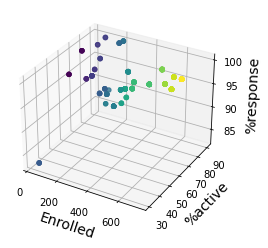

In [5]:
#3d scatter plot using the 3 predicting variables, colored according to the predicted variable.
fig = plt.figure()
x1 = x.iloc[:,0]
x2 = x.iloc[:,1]
x3 = x.iloc[:,2]
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Enrolled', fontsize=14)
ax.set_ylabel('%active', fontsize=14)
ax.set_zlabel('%response', fontsize=14)
ax.scatter3D(x1, x2, x3, c=predict, cmap='viridis');


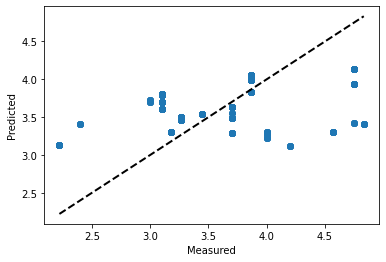

In [6]:
#scatter plot of measured values of avg_quality vs the predicted values, and the plot of line of best fit.
fig, ax = plt.subplots()
y = all_data.avg_quality
ax.scatter(y, predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

- **Analysis**: Here, we have tried to use multivariate regresssion to check if we can predict the rating of the instructor using independent variables like the enrollment size of courses, %active, and %response. Upon analysis, we got an r-squared value of 0.2, implying that there is a weak linear relationship between these factors. The 3-d scatter plot and the (linear regression line-scatter plot) demostrates this result. As can be seen, the regression line generated does not do an ideal job at predicting the dependent values.


  * We can also try the multivariable regression again with difficulty ratings. Since we saw that quality and difficulty ratings had very little correlation, we'd like to verify that these factors have no real correlation with difficulty ratings either:

In [7]:
x = all_data[['enrolled', '%active', '%response']]
y = all_data[['difficulty']]
model = l.fit(x,y )
predict = model.predict(x)
r2 = model.score(x, y)

print('r2 value: ' + str(round(r2, 2)))
print('enrolled coefficient: {:.2f}'.format(model.coef_[0][0]))
print('%active coefficient: {:.2f}'.format(model.coef_[0][1]))
print('%response coefficient: {:.2f}'.format(model.coef_[0][2]))

r2 value: 0.04
enrolled coefficient: 0.00
%active coefficient: 0.01
%response coefficient: -0.08


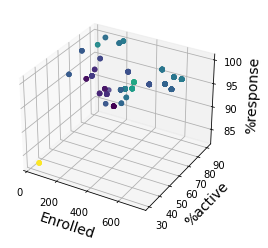

In [8]:
#3d scatter plot using the 3 predicting variables, colored according to the predicted variable
fig = plt.figure()
x1 = x.iloc[:,0]
x2 = x.iloc[:,1]
x3 = x.iloc[:,2]
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Enrolled', fontsize=14)
ax.set_ylabel('%active', fontsize=14)
ax.set_zlabel('%response', fontsize=14)
ax.scatter3D(x1, x2, x3, c=predict, cmap='viridis');

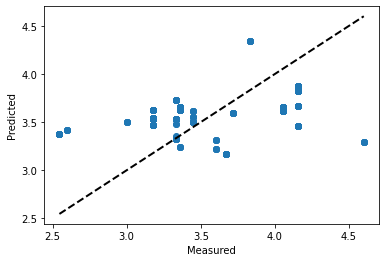

In [9]:
#scatter plot of measured values of difficulty vs the predicted values, and the plot of line of best fit.
fig, ax = plt.subplots()
#print(predict)
y = all_data.avg_difficulty
ax.scatter(y, predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

- **Analysis**:  Here, we have tried to use multivariate regresssion to check if we can predict the difficulty rating of the instructor using independent variables like the enrollment size of courses, %active, and %response. Upon analysis, we got a r-squared value of 0.04, signifying that there is no linear relationship between these factors. The 3-d scatter plot and the (linear-regression line - scatter plot) demostrates this result. As can be seen, the regression line generated does not do an ideal job at predicting the dependent values.

#### **(2)** Use k-means clustering to plot class size by instructor rating, color coded by clusters
    - Clusters: departments

In [10]:
clustering= KMeans(n_clusters = 6, random_state = 15)
clustering.fit(all_data[['avg_quality','enrolled']])
print(clustering.cluster_centers_)

[[  4.13836051 572.875     ]
 [  3.76252723  49.35294118]
 [  3.23074402 418.0619469 ]
 [  4.4464018  717.72413793]
 [  3.46511628 219.76744186]
 [  3.86956522 664.5       ]]


In [11]:
cluster_labels = clustering.labels_
print(cluster_labels[0:5])
all_data["cluster_label"] = cluster_labels
all_data.head()

[4 4 4 4 4]


,Unnamed: 0,instructor,quality,difficulty,take_again,timestamp,course_number,department,course_name,avg_quality,avg_difficulty,questions,%response,contributions,avg_response_time,enrolled,%instructor_response,%active,semester,cluster_label
0,0,Haym Hirsh,4,3,Yes,"Dec 11th, 2020",4700,CS,CS 4700,3.181818,2.545455,409,99,1875,22,238,96,55,SP20,4
1,1,Haym Hirsh,4,3,Yes,"May 11th, 2020",4700,CS,CS 4700,3.181818,2.545455,409,99,1875,22,238,96,55,SP20,4
2,2,Haym Hirsh,4,3,Yes,"Apr 9th, 2020",4700,CS,CS 4700,3.181818,2.545455,409,99,1875,22,238,96,55,SP20,4
3,3,Haym Hirsh,1,2,No,"Dec 14th, 2019",4700,CS,CS 4700,3.181818,2.545455,409,99,1875,22,238,96,55,SP20,4
4,4,Haym Hirsh,1,4,No,"Nov 12th, 2019",4700,CS,CS 4700,3.181818,2.545455,409,99,1875,22,238,96,55,SP20,4


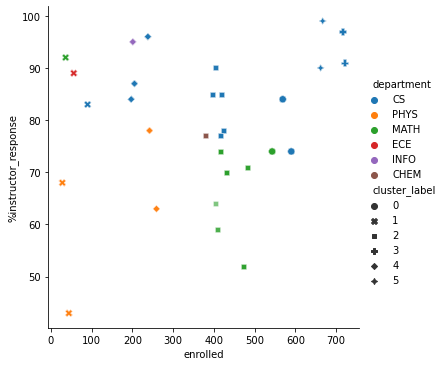

In [12]:
sns.relplot(x='enrolled',y='%instructor_response',hue='department', style='cluster_label', s = 50, alpha = 0.6,
            data=all_data)
plt.show()

**Analysis**: Here, we have tried to observe if there are any clusters formed according to departments when we train our model on variables like class size (enrolled) and professor ratings (avg_quality). We trained our data on 6 clusters because we have 6 major (for which we have significant data) department values. We also color coded all our points according to the departments. As we can see in the scatter plot, the predicted clusters do not accurately represent the observed departments, showing that there is no correlation between these variables




#### **(3)** Use linear regression and correlation coefficient to determine if there is a correlation between the variables class size and piazza activity for a course.

Lin reg slope: -0.01
r^2 0.029669164221485356


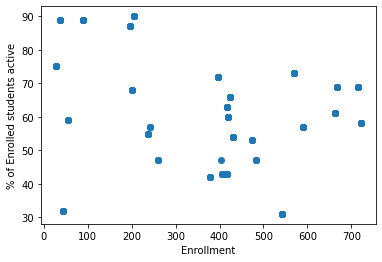

In [13]:
plt.scatter(all_data['enrolled'], all_data['%active'])
plt.xlabel('Enrollment')
plt.ylabel('% of Enrolled students active')

l = LinearRegression()
model = l.fit(np.array(all_data[['enrolled']]).reshape(-1,1), all_data[['%active']])
predictions = model.predict(all_data[['enrolled']])
r = model.score(all_data[['enrolled']],all_data['%active'])
print("Lin reg slope: {:.2f}".format(l.coef_[0][0]))
print('r^2', r)

- **Analysis**: Visually, there is a very no correlation between relative piazza engagement and course enrollment on piazza. Our very low linear correlation coefficient supports this, showing that there is an almost negligible linear trend. The slope indicates that for every additional enrolled student, the percentage of students contributing on piazza is expected to decrease by .01%. This suggests that our idea that students are less likely to post in a larger class is wrong. In hindsight, this is understandable because piazza allows students to post anonymously, or only to the instructors, so the effect of being shy or embarrassed to post to a larger audience is minimized.

#### **(4)** Use linear regression and correlation coefficient to determine if there is a correlation between the variables instructor response time and piazza activity for a course.

Lin reg slope: -0.35
r^2 0.1779932410278242


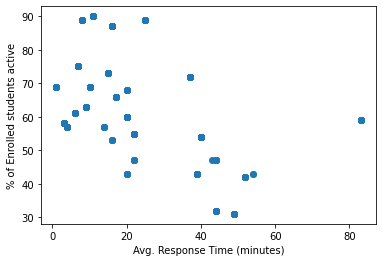

In [14]:
#plot
plt.scatter(all_data['avg_response_time'], all_data['%active'])
plt.xlabel('Avg. Response Time (minutes)')
plt.ylabel('% of Enrolled students active')

#model
l = LinearRegression()
model = l.fit(np.array(all_data[['avg_response_time']]).reshape(-1,1), all_data[['%active']])
predictions = model.predict(all_data[['avg_response_time']])
r = model.score(all_data[['avg_response_time']],all_data['%active'])
print("Lin reg slope: {:.2f}".format(l.coef_[0][0]))
print('r^2', r)

    - We can see by the plot that there is an outlier where the average response time is over 80 minutes, let's see if removing it gives us a better idea of the trend in the data.

Lin reg slope: -0.44
r^2 0.2148244336877424


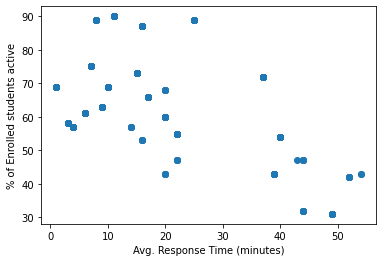

In [15]:
#new copy of all_data with outlier removed
all_data_copy = all_data.copy()
all_data_copy = all_data_copy[all_data_copy.avg_response_time < 80]

#previous code the same, with new version of all_data
plt.scatter(all_data_copy['avg_response_time'], all_data_copy['%active'])
plt.xlabel('Avg. Response Time (minutes)')
plt.ylabel('% of Enrolled students active')

l = LinearRegression()
model = l.fit(np.array(all_data_copy[['avg_response_time']]).reshape(-1,1), all_data_copy[['%active']])
predictions = model.predict(all_data_copy[['avg_response_time']])
r = model.score(all_data_copy[['avg_response_time']],all_data_copy['%active'])
print("Lin reg slope: {:.2f}".format(l.coef_[0][0]))
print('r^2', r)

- **Analysis**: Visually, there is a weak negative correlation between relative piazza engagement and average response time for questions. Our low linear correlation coefficient supports this, showing that there is a weak linear trend. The slope indicates that for every minute of increase in average response time, the percentage of students contributing on piazza is expected to decrease by .44 . This suggests that our idea that students are more likely to participate by asking quesions if they believe their question would be answered sooner may or may not be true, because 0.21 is neither a negligibly low correlation coefficient not a convincingly high one, without further analysis to determine if the result is due to chance or is unlikely to have been obtained if there was truly no correlation. 

### Extra Analysis

Out of curiosity, we wondered if the percieved difficulty of a course by students correlated with average response times on piazza. We thought perhaps if students struggled more with the class, they would struggle to answer their peers' questions on piazza. Or, perhaps if students did not get timely responses to their questions, they would be discouraged to ask questions on piazza to get help with what they struggled with in the course.

Lin reg slope: 0.01
r^2 0.03941082268953178


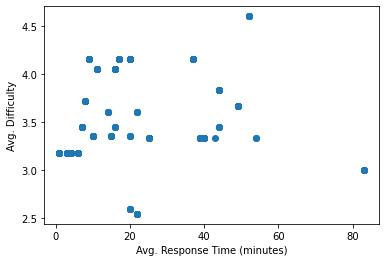

In [16]:
#plot
plt.scatter(all_data['avg_response_time'], all_data['avg_difficulty'])
plt.xlabel('Avg. Response Time (minutes)')
plt.ylabel('Avg. Difficulty')

#model
l = LinearRegression()
model = l.fit(np.array(all_data[['avg_response_time']]).reshape(-1,1), all_data[['avg_difficulty']])
predictions = model.predict(all_data[['avg_response_time']])
r = model.score(all_data[['avg_response_time']],all_data['avg_difficulty'])
print("Lin reg slope: {:.2f}".format(l.coef_[0][0]))
print('r^2', r)

- **Analysis**: Visually, there is no discernable correlation between relative average response time and difficulty ratings of instructors. Our very low linear correlation coefficient supports this, showing that there is a nearly negligible positive trend. The slope indicates that for every minute of increase in average instructor response time, the expected difficulty rating for a review of that instructor increases by around 0.01 . Because this was not one of our main analyses in the project, we did not include it in the significance analysis section below, but we think it is safe to assume from these results that there is no significant correlation. Many other factors exist for how difficult a student perceives a class to be (discussed later in Conclusions), and instructor response time on piazza is apparently not one of the major ones.

For context of our data, we thought it would be helpful to show the selection of departments our courses and reviews were from. We tried to ask people from as diverse majors as we could for their past courses' piazza links, but because most interdisciplinary majors include CS courses, and because in general CS courses use piazza more than other subjects do, a larger proportion of our sample courses were from the CS department than we expected. Also, because CS courses at Cornell generally have much bigger class sizes than courses in other departments, it makes sense that each CS course tends to have many more reviews than a non-CS course.

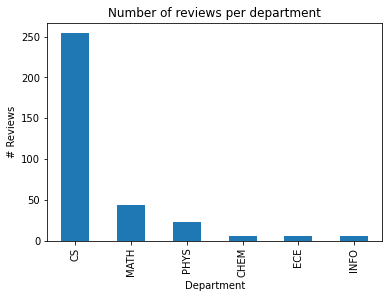

In [24]:
bar = all_data.department.value_counts().plot(kind='bar', title='Number of reviews per department', xlabel='Department', ylabel='# Reviews')

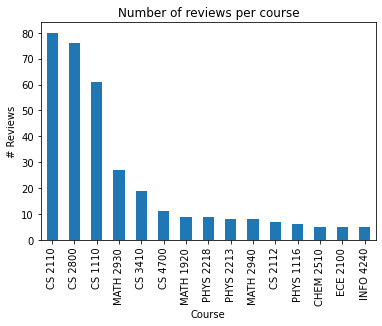

In [18]:
bar = all_data.course_name.value_counts().plot(kind='bar', title='Number of reviews per course', xlabel='Course', ylabel='# Reviews')

- Some departments like ENGRI, ORIE, MAE, ORIE, and AEP are not shown  because we don't have a large enough number of reviews for classes in these departments. Notably, CS2110 has vastly more reviews than any other class. This is probably because CS2110 is an engineering distribution requirement (so every engineering major at Cornell must take it), is a huge class, and has been offered every semester for many years, usually by the same instructor (Prof. Gries), so there are ample reviews of his teaching of the course. CS2800 is only a requirement for CS majors, and while CS1110 is techincally required for all engineers, many people skip it because they have AP credit from high school, and it is often taught by different professors from semester to semester.

Out of curiosity, we wanted to look for any correlations between the size of a course, the percentage of students active on the piazza, the average quality ratings for the course with its associated instructor, and the course department, just to better understand the relationship between these variables in our data.

In [25]:
#3d scatter plot against enrolled, %active and quality
fig = px.scatter()
fig = px.scatter_3d(all_data, x = 'enrolled', y = '%active', z = 'avg_quality', color = 'department')
fig.show()

- **Analysis**: The most that can be said about this graph is that CS courses tend to have slightly higher enrollments and piazza activity rates than their non-CS counterparts. This makes sense, as it is commonly known tha CS courses have large enrollments at Cornell and tend to be heavily reliant on piazza for help with the course. 

## Evaluation of Significance
For our linear regression models, we will run random permutation tests on our data to determine a p-value with which to judge if our results were significant or not. Permutation tests essentially shuffle the observed results with respect to the independent variables and calculate a linear regression slope for each shuffling. The p-value represents the probability of getting the linear regression slope we get from the data assuming the data had no correlation. We use the threshold 0.005 for statistical significance because it is generally viewed as the default (and because it was not covered in class how to choose a more appropriate one for our data). 

In [20]:
from sklearn.svm import SVC
import warnings
svm = SVC(kernel='linear')

#### **(1)** Random permutation test on our multivariate linear regression

In [21]:
X = all_data[['enrolled',  '%active', '%response']]
y = all_data[['quality']]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    s, arr, p_value = sklearn.model_selection.permutation_test_score(svm, X, y, n_permutations=30)
print("p-value of permutation test with n = 30: {:.5f}".format(p_value))

p-value of permutation test with n = 30: 1.00000


- Because our p-value is quite high, our correlation in our linear regression model is not statistically significant. So we reject the null hypothesis that there is a correlation between class size, relative piazza engagement, relative piazza answered question proportions, with respect to quality ratings of a course. This is consistent with our visualizations above, where there were no discernable relationships between the independent and dependent variables.

#### **(3)** Repeat linear regression of piazza activity vs class size, but randomized, to see if we get similar results

In [22]:
X = (np.array([all_data['%active']])).transpose()
y = np.array(all_data['enrolled'])
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    s, arr, p_value = sklearn.model_selection.permutation_test_score(svm, X, y, n_permutations=100)
print("p-value of permutation test with n = 100: {:.5f}".format(p_value))

p-value of permutation test with n = 100: 0.00990


- Because our p-value is higher than our threshold, our correlation in our linear regression model is not statistically significant. So we reject the null hypothesis that there is a correlation between relative piazza engagement and the size of a course. This is consistent with our visualization above, where there were no discernable relationships between the two variables.

#### **(4)** Repeat linear regression of piazza activity vs instructor response time, but randomized, to see if we get similar results

In [23]:
X = (np.array([all_data['%active']])).transpose()
y = np.array(all_data['avg_response_time'])
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    s, arr, p_value = sklearn.model_selection.permutation_test_score(svm, X, y, n_permutations=100)
print("p-value of permutation test with n = 100: {:.5f}".format(p_value))

p-value of permutation test with n = 100: 0.00990


- Again, because our p-value is higher than our threshold, our correlation in our linear regression model is not statistically significant. So we reject the null hypothesis that there is a correlation between relative piazza engagement and the average instructor response time of a course. This is consistent with our visualization above, where there were no discernable relationships between the two variables.

## Interpretation and Conclusions

* Through significance analysis, we discovered that there were no significant patterns that we planned to look for in our preregisteration statements. While it is somewhat disappointing, it is quite understandable. The piazza data did not have much variation from class to class if you look at the raw data, so what variation there was appeared to be small and random. In addition, there are a wide range of factors that contribute to a student's rating of their experience with an instructor and in the course. Just to name a few:
    - the student's prior experience in the subject
    - the student's workload from other courses
    - the number of friends the student had in the course
    - the student's learning style (and instructor's teaching style)
    - other impactful events or responsibilities the student has outside of academics
    - the student's personal opinions
    - the instructor's experience level in the course (though we should note the effect of this should be minimal because we only had a few courses who's data we have multiple semesters of, and they were consecutive semesters and it is known that they are not among the first semesters the instructor had taught said course)
- Perhaps another reason why the results are not what we were expecting is because we are currently typing this report in a virtual learning setting. Maybe we are overestimating the effect of online engagement in student learning experiences because it plays a larger role for us right now than it did for the students who gave us their piazza data links from previous (essentially all in-person) semesters.
- We also conclude that much more data is needed to generalize our findings. We discuss this in the next section, but the data we used is covers only a subset of courses taught at the college level.
- In particular, it would be interesting to see this experiment redone using exclusively courses from Fall 2020 and Spring 2021, as most of these courses would be taught virtually. This suggests online interaction, particularly through piazza, would play a greater role in students' learning experiences, so we believe then instructor involvement and the general quality of online engagement would play a larger role in quality ratings. 
- In addition, it was not until after we had nearly finished the project that we learned there were other (probably better) places to source our student opinion data from instead of ratemyprofessors.com . For example, we heard that course evaluations are posted online publicly, and that there is an alternate version of ratemyprofessors.com that is for Cornell courses only (we cannot recall the name, as we heard this fleetingly mentioned in a peer review). Perhaps those sources would have given us more reliable and consistent data. However, using ratemyprofessors.com has its advantage in that it can be used for any college that has associated reviews on the site.



## Limitations

* Besides the limitations of data collection we must also note the limitations of what we can infer from the data. Often times, people tend to leave online reviews about things they have particularly strong opinions about. Also, people often have wildly different opinions on the same instructor's teaching style, based on a variety of factors such as prior relevant experience, workload from other classes, learning style, etc. Thus we can reasonably expect a mixed bag of reviews for all instructors. 
* Piazza is generally only used for STEM and technical courses. Looking forward, if we continued this project, we would love to investigate how humanities and liberal arts courses involve online engagement and participation, if not with Piazza, especially in the times of remote learning.
* Logistically, the most difficult part of the project was gathering the data. Neither of us had experience with web scraping. On top of that, ratemyprofessors.com would rename its HTML tags every week or so, and every time they did, we had to revise our code. Learning web scraping, manually cleaning and pairing data, determining how to deal with an assortment of typos, and thinking how best to merge our datasets were some of the issues we faced, took up a significant amount of time every time we added new course data when we found it. We think this could be one of the limitations of this report, because it may be hard to reproduce with new data

## Source Code


- All source code, raw data sets, and previous project phases are available publicly on the project's Github page:
    - https://github.com/Amina-S/2950_project
- Data collection and cleaning code: 
    - [Appendix](Appendix.ipynb)
- Web Scraping code: 
    - [Appendix 2](Appendix2.ipynb)

## Acknowledgements

We would like to recognize ratemyprofs.com and piazza.com from which we gathered our raw data through web scraping.


We would also like to thank our peers who helped us gather our data by sending us the links to their past piazza.com courses:
- Amulya Khurana
- Anissa Dallmann
- Dakota Thomas
- Destiny Nwafor
- Elena Peot
- Enya Zimecka
- Luis Enriquez
- Rayshard Thompson
- Rizo Rakhmanov
- Sanjana Namreen

We would also like to thank Professor Mimno and the INFO 2950 course staff for helping this report come to fruition.